# 웹에서 주문 수를 분석하는 테크닉 

이 데이터로 어떤 것을 할거냐?

* 어떤 기업 쇼핑몰 사이트의 상품 주문 수의 추세를 분석, 판매량 개선의 방향을 찾는 것이 목적 

* 매출 추세 , 언제 어떻게 누가 구입했는지 부서간의 데이터를 연결하는 작업  = > 어떻게 연결할 것인가?


In [1]:
# 고객 데이터 읽기 

import pandas as pd 

customer_master = pd.read_csv('customer_master.csv')  # 고객의 데이터 이름, 성별

transaction_1 = pd.read_csv('transaction_1.csv')  # 구매 내역 데이터
transaction_2 = pd.read_csv('transaction_2.csv') # transaction_1과 관련된 구매내역 분할데이터
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv') # 구매내역 상세 데이터
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv') # 구매내역 상세 데이터-2 

In [2]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
customer_master.tail()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시
4999,HI349563,정지석,2019-07-31 22:49,horii_kanji@example.com,M,21,1998-02-06,서울특별시


In [4]:
item_master= pd.read_csv('item_master.csv')

item_master.head()
item_master.tail()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [5]:
# 데이터를 세로로 UNIon 시켜주는작업 왜? 분할 된 데이터니까!! concat이라는 함수 쓰는거야

transaction = pd.concat([transaction_1,transaction_2], ignore_index =True)

transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [6]:
#  매출 데이터끼리 결합 
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2], ignore_index =True)


In [7]:
len(transaction_detail)

7144

### transaction 과 transcation_detail의 join ! pd.merge('transcation', 'transaction_detail['요소값', '요소값', '요소값'])

In [8]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id","payment_date",
                                                      "customer_id"]], on="transaction_id", how="left")

In [9]:
join_data =pd.merge(join_data, customer_master, on='customer_id', how ="left")
join_data = pd.merge(join_data, item_master, on='item_id', how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [10]:
join_data.tail()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214,이승채,2019-04-07 3:20,tahara_yuuko@example.com,F,74,1944-12-18,대전광역시,PC-B,85000


In [11]:
join_data.shape

(7144, 15)

 # 필요한 데이터 칼럼을 만들자! 
 
 왜 만드는가???  일단 좀 계산을 해야겠지?
 
 그래서 만들어 보는거야 

price , quantity , item_price,  =>>> quantity, item_price, price 

In [12]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]

join_data[["quantity", "item_price", "price"]].head()

# 데이터 가공은 한번 잘못하면 집계 실수로 수치상 에러가 생긴다. 잘못된 데이터는 회사를 망하게 할 수 있다!!!

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [13]:
# PRICE의 총합 알아보기 , 데이터 검산 

print(join_data["price"].sum(),"원")

971135000 원


# 각 종 통계량 파악 

join_data.isnull()

값.isnull() null을 체크한다. 즉 Nan값을 체크함 결측값 체크! 

notnull은 null이 아닌것을 체크한다. 왜 체크하냐?!

데이터 분석을 진행 할 때 먼저 크게 
1. 결측치( 결촌치)를 파악해야한다.

2. 전체를 파악할 수 있는 숫자 _.decribe()함수 사용

In [14]:
join_data.isnull().sum()


detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [15]:
join_data.describe()
# count 데이터의 갯수
# mean 평균
# std 표준편차
# min 최솟값
# amx 최댓값 


,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [16]:
print(join_data["payment_date"].min())  # 2월 1일부터 7월 31일까지 +-----------------------------;
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


# 월별로 데이터 정리하기 

  * 시계열 상황을 살펴본다 => 이유는 데이터가 짧으면 모르겠는데 데이터가 엄청 많고 오래된 데이터라면 
  시게열 변화를 잘 못 분석할 수 있다. 그러니까 데이터 범위를 좁혀서 분석하는 것도 하나의 방법이다. 
  
  -> 시계열 분석이란 시간의 흐름에 따라 자료(data)를 분석하고 여러가지 변수들과의 인과 관계를 분석하는 방법론. 
  시계열 : https://namu.wiki/w/%EC%8B%9C%EA%B3%84%EC%97%B4%20%EB%B6%84%EC%84%9D
  
  경제학에서도 많이 쓰임 
  
  * 전체적으로 매출이 늘어나고있는지 줄어들고 있는지 파악하는것이 분석의 첫 걸음! 
  => 구입일인 payment_date에서 연 월을 추출해서 새롭게 칼럼을 작성! 그 후로 price를 집계해서 표시
  
  

In [17]:
# payment_date의 데이터형을 확인

join_data.dtypes

# payment_date는 object라는 것을 알 수 있다.  date니까 date 타임형으로 바꾸어준다! 

join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])

join_data["payment_month"] = join_data["payment_date"].dt.strftime("%y%m")

# 데이터 형 변환 

일단 모든 칼럼들의 형변환을 시켜준다 _.dtypes

* Python datetime, pandas Timestamp 객체를 문자열로 변환 


join_data_str = str(join_data)

type(join_data_str)


* 문자열을 python datetime, pandas Timestamp 객체로 변환 



In [18]:
join_data[["payment_date", "payment_month"]].head()

# 판다스의 datetime의 dt를 사용하면 시간 추출가능


,payment_date,payment_month
0,2019-02-01 01:36:57,1902
1,2019-02-01 01:37:23,1902
2,2019-02-01 02:34:19,1902
3,2019-02-01 02:47:23,1902
4,2019-02-01 04:33:46,1902


# .groupby() 로 그룹별로 집계하기 !

 * groupby() 는 집계하고 싶은 칼럼과 집계 방법(sum)을 기술한다. 또 price 만 표시하기 위해 
 price 컬럼만 지정했다. 
-https://rfriend.tistory.com/383 

In [19]:
join_data.groupby("payment_month").sum()["price"]

payment_month
1902    160185000
1903    160370000
1904    160510000
1905    155420000
1906    164030000
1907    170620000
Name: price, dtype: int64

# 위 값에서 분석하는 방법

2019년 5월에 매출이 내려갔고 다시 금방 회복했음 연간 20 억 정도의 매출을 기대할 수 있다. 

# 월별 , 상품별로 데이터를 집계해보자 



In [20]:
# 월별 상품별로 매출의 합계, 수량 표시

join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

price  quantity
payment_month item_name                    
1902          PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
1903          PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
1904          PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
1905          PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
1906          PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
1907          PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

# groupby에서 출력하고 싶은 컬럼이 여러개

* groupby에서 출력하고 싶은 칼럼이 여러 개 있을 경우, 리스트형으로 지정 
* 출력 결과가 직관적으로 이해하기 위해 pd.pivot_table을 사용 
* pd.pivot_table 함수의 구성요소 
- 행인덱스 index = 'dfdfd'

- 열인덱스 columns = 'dfdfs'

-데이터 값 values ='dfdafad'

-데이터 집계함수 aggfunc ='sum or mean.... optional function'



In [21]:
pd.pivot_table(join_data, index ='item_name',columns ='payment_month', values =['price','quantity'],
              aggfunc='sum')

price                                                    \
payment_month      1902      1903      1904      1905      1906      1907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                           
payment_month     1902 1903 1904 1905 1906 1907  
item_name                                        
PC-A               483  520  518  497  520  505  
PC-B               297  300  276  298  282  332  
PC-C               165  159  183  171  182  162  
PC-D               173  143  135  144  160  145  
PC-E               285  305  309  280  302  341

pivot_table은 행과 칼럼을 지정할 수 있다. 행에는 상품명,
칼럼에는 월이 오게 index와 columns로 지정

In [22]:
graph_data = pd.pivot_table(join_data, index = 'payment_month', columns ='item_name',
                           values='price', aggfunc= 'sum')

graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
1902,24150000,25245000,19800000,31140000,59850000
1903,26000000,25500000,19080000,25740000,64050000
1904,25900000,23460000,21960000,24300000,64890000
1905,24850000,25330000,20520000,25920000,58800000
1906,26000000,23970000,21840000,28800000,63420000


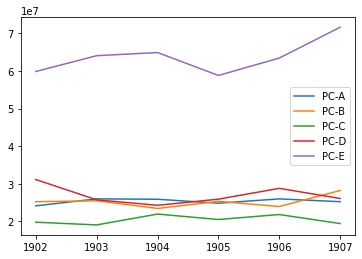

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"],label = 'PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"],label = 'PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"],label = 'PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"],label = 'PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"],label = 'PC-E')
plt.legend()